# Data Analysis with Python

In this project we are going to explore several features to see if we can find any certain relation between our features and accurness of stroke in our patients!


## Importing libraries 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


## Importing Data

In this project we studied the data of more than 5k patients using the folowing dataset:
[Stroke_Prediction_Dataset](https://huggingface.co/datasets/Nnaodeh/Stroke_Prediction_Dataset/)

In [68]:
df = pd.read_csv("HealthCare-stroke-data.CSV")

In [69]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [71]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [72]:
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


As you can see, we have many object parameters that we have to encode in the preproccesing part!

## Cleaning and Preproccesing Data

### Handling Duplicate Data

lets start with checking if there is any duplicate rows, and drop them 

In [73]:
df.shape

(5110, 12)

In [74]:
df = df.drop_duplicates()

In [75]:
df.shape

(5110, 12)

now its time to drop any column that may be useless to your search, like adderess of phone number.
fortunatly all of our columns may be related to occurness of stroke, so im gonna let the datafram unchanged and move to the next part!
you can use the following code to drop any column you want:

In [76]:
# df.drop("the column's name")

### Handling Outlayers

#### Gender Outlayers:

In [92]:
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

we can see that there are 3 categories in gender column and there is only 1 data registered as "other" group, so its better to consider it an outlayer and drop it:  

In [93]:
df = df[df['gender'] != 'Other']
gender_counts = df["gender"].value_counts()

In [94]:
gender_counts


Female    2994
Male      2115
Name: gender, dtype: int64

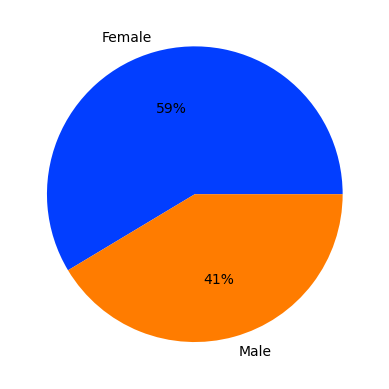

In [97]:
palette_color = sns.color_palette('bright') 
plt.pie(gender_counts, labels=["Female", "Male"] ,colors=palette_color, autopct='%.0f%%');


#### Age Outlayers:

#### Glucose level Outlayers:

### Handling Categorical Data

In [50]:
for col in df.columns:
        print(col, ": ", len(df[col].unique()), "labels")


id :  5110 labels
gender :  3 labels
age :  104 labels
hypertension :  2 labels
heart_disease :  2 labels
ever_married :  2 labels
work_type :  5 labels
Residence_type :  2 labels
avg_glucose_level :  3979 labels
bmi :  419 labels
smoking_status :  4 labels
stroke :  2 labels


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [58]:
df = df[df['gender'] != 'Other']
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

#### Label Encoding


#### One-Hot Encoding

### Handling Missing Data

In [44]:
df.isna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [46]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

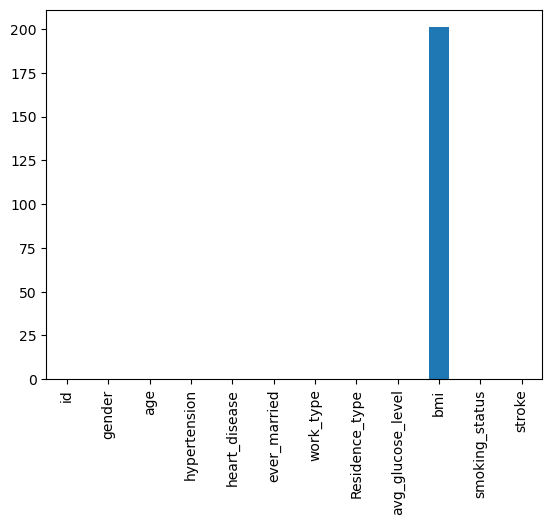

In [47]:
df.isna().sum().plot(kind="bar")
plt.show()


we can see that there are Nan data in the bmi parameter.
the most related columns to BMI in our dataset are gender and age so i am going to write two small machine learning models to predict the missing bmi and fill them.

#### Machine Learning

##### k-Nearest Neighbors

Here we are going to use k-nearest neighbors(KNN) imputaion to fill the missing BMIs!

# Normalizing Data

# Plotting and Comparison

# Results